# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

kc_house_data_df = pd.read_csv('kc_house_data.csv')
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#kc_house_data_df = kc_house_data_df.drop(['id','grade','sqft_lot15'], axis = 1)
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

<AxesSubplot:>

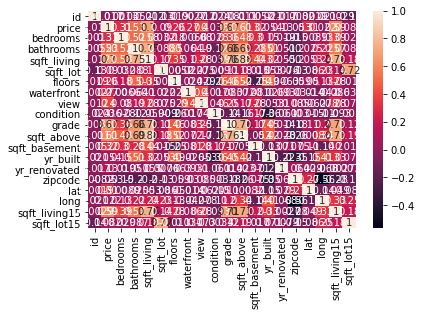

In [3]:
sns.heatmap(kc_house_data_df.corr(), annot=True)

In [ ]:
#matrix = kc_house_data_df.corr()
#print(matrix)

correlations = kc_house_data_df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'price' & col2 != 'price'") # Filter by variable
# output of this code will give correlation of column v2 with all the other columns 

As it was difficult to see the correlation between price and all columns clearly in heatmap , I checked correlation of price with all the columns. I want to predict price of the house with test dataset later and hence I was interested to check the correlation of price with all column. Now the price had highest correlation with sqft_living,grade of 70.2% and 66.74% and hence we will use these 2 columns for building our model

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [5]:
X = kc_house_data_df[['sqft_living', 'grade']]

y = kc_house_data_df['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Here I am segregating the dataset in to 2 parts , one is the train dataset (X_test, y_test) which will be used to train my model. Other dataset will be test (X_test, y_test) which will be used to test my model and see if the predicted value using the test dataset is accurate. test_size = 0.4 implies , my test data set will be 40% of original dataset and which implies train dataset will be 60%

In [7]:
X_train.head()

,sqft_living,grade
2435,2550,7
256,2360,7
13911,1770,7
1135,2940,8
12181,2210,8


In [8]:
X_test.head()

,sqft_living,grade
3834,1050,7
1348,2040,8
20366,2500,8
16617,2360,7
20925,1670,7


In [9]:
y_train.head()

2435     355000.0
256      385000.0
13911    712500.0
1135     420000.0
12181    382500.0
Name: price, dtype: float64

In [10]:
y_test.head()

3834     349950.0
1348     450000.0
20366    635000.0
16617    355500.0
20925    246950.0
Name: price, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lr = lm.fit(X_train,y_train)

In [12]:
print(lm.intercept_)

-609628.142455098


In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,181.061130
grade,100937.660113


In [14]:
predictions = lm.predict(X_test)

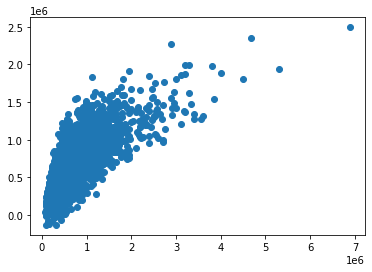

In [15]:
plt.scatter(y_test,predictions)

## Error Terms

Finally, plot your error terms!

C:\Users\suves\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


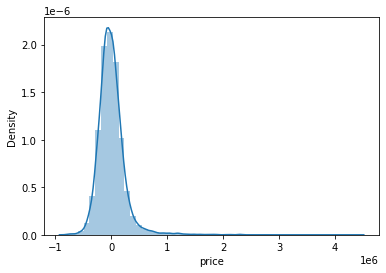

In [16]:
sns.distplot((y_test-predictions),bins=50);

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.5416353463195268

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.54901 
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case. 
3. Was your plot of the error terms a bell curve? Not really

1. 0.54901 
2. Usually higher R square(between 80 to 85% or higher) would mean predicted value and actual value (in test data set) would be closer. In my case R-square is 54% whih doesn't seem to be very bad , but this indicates there would be more scope of errors when predicting value , Actually when I saw the data I realised there is an issue of how price is being labeled respective to the 2 columns(sqft_living, grade) which have highest correlation with price. As shown below , first 3 rows have a grade value of 7 hence a higher "sqft_living" would have meant higher price. However the price for the lowest sqft_living (1770 )is highest which doesn't seem to be correct when we are trying to predict price using these 2 columns only and hence this might have lead to the regression line with lower R-square value. As the assignment had suggested to use only 2 columns so I have produced model using only 2 columns. Hence as per my opinion other column like latitude might be a factor to explain this high difference. May be the house with lowest square feet is in Costlier city.

	

In [20]:
X_train.head()

,sqft_living,grade
2435,2550,7
256,2360,7
13911,1770,7
1135,2940,8
12181,2210,8


In [21]:
y_train.head()

2435     355000.0
256      385000.0
13911    712500.0
1135     420000.0
12181    382500.0
Name: price, dtype: float64